#1. Each downloading only allows index data for one year, you can download multiple years and then use Python to combine them into one dataframe

In [1]:
!pip install pyinform

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 1.5 MB/s eta 0:00:00


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.tsa.stattools import adfuller
import pyinform.transferentropy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping




In [3]:
# List of file paths for each year's data
file_paths = ['/content/DJIA_1.csv','/content/DJIA_2.csv','/content/DJIA_3.csv','/content/DJIA_4.csv','/content/DJIA_5.csv','/content/DJIA_6.csv']

# Create an empty list to store DataFrames
df_DJIA= []

# Read each data file into a separate DataFrame and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    df_DJIA.append(df)

df_DJIA = pd.concat(df_DJIA, ignore_index=True)

print(df_DJIA)

            Date       Open       High        Low      Close
0     04/22/2024  38,116.89  38,447.16  37,985.07  38,239.98
1     04/19/2024  37,801.98  38,102.57  37,781.61  37,986.40
2     04/18/2024  37,847.21  38,083.76  37,681.52  37,775.38
3     04/17/2024  37,949.67  38,036.70  37,611.56  37,753.31
4     04/16/2024  37,992.22  37,992.22  37,713.70  37,798.97
...          ...        ...        ...        ...        ...
1509  04/27/2018  24,342.14  24,359.38  24,194.45  24,311.19
1510  04/26/2018  24,128.72  24,402.46  24,128.72  24,322.34
1511  04/25/2018  24,070.20  24,146.34  23,823.08  24,083.83
1512  04/24/2018  24,579.94  24,579.94  23,828.73  24,024.13
1513  04/23/2018  24,488.07  24,536.89  24,328.54  24,448.69

[1514 rows x 5 columns]


In [4]:
df_DJIA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1514 non-null   object
 1   Open    1514 non-null   object
 2   High    1514 non-null   object
 3   Low     1514 non-null   object
 4   Close   1514 non-null   object
dtypes: object(5)
memory usage: 59.3+ KB


In [5]:
columns = ['Open', 'High', 'Low', 'Close']

# Replace commas with empty strings and convert to numeric
df_DJIA[columns] = df_DJIA[columns].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')


In [6]:
df_DJIA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1514 non-null   object 
 1   Open    1514 non-null   float64
 2   High    1514 non-null   float64
 3   Low     1514 non-null   float64
 4   Close   1514 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.3+ KB


In [7]:
print(df_DJIA.head(5))

         Date      Open      High       Low     Close
0  04/22/2024  38116.89  38447.16  37985.07  38239.98
1  04/19/2024  37801.98  38102.57  37781.61  37986.40
2  04/18/2024  37847.21  38083.76  37681.52  37775.38
3  04/17/2024  37949.67  38036.70  37611.56  37753.31
4  04/16/2024  37992.22  37992.22  37713.70  37798.97


<Figure size 1000x600 with 0 Axes>

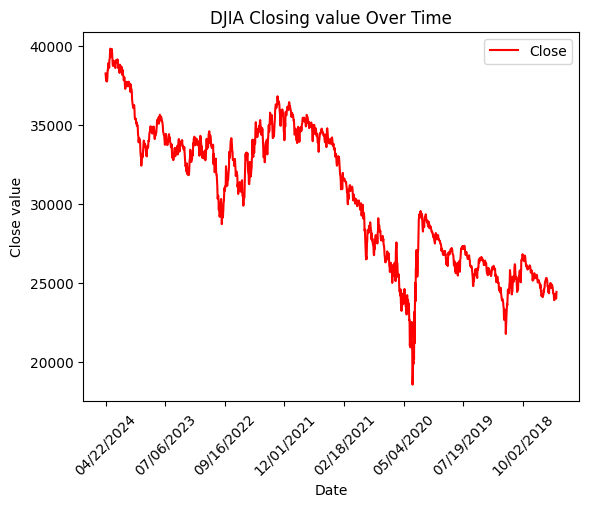

In [8]:

# Plot the data
plt.figure(figsize=(10,6))  # Adjust figure size if needed
df_DJIA.plot(x='Date', y='Close', color='Red')

# Customize x-axis ticks
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Add labels and title if needed
plt.xlabel('Date')
plt.ylabel('Close value')
plt.title('DJIA Closing value Over Time')

# Show plot
plt.show()


In [9]:
df2 = pd.read_csv("/content/NASDAQ.csv")
print(df2)

            Date  Close/Last      Open      High       Low
0     04/22/2024    15451.31  15396.13  15539.00  15265.66
1     04/19/2024    15282.01  15547.10  15576.70  15222.78
2     04/18/2024    15601.50  15705.69  15786.12  15587.50
3     04/17/2024    15683.37  15942.29  15957.03  15654.51
4     04/16/2024    15865.25  15856.38  15965.79  15822.02
...          ...         ...       ...       ...       ...
1505  04/27/2018     7119.80   7195.52   7197.15   7083.95
1506  04/26/2018     7118.68   7080.49   7143.94   7055.66
1507  04/25/2018     7003.74   7009.99   7030.74   6926.97
1508  04/24/2018     7007.35   7160.77   7171.67   6961.52
1509  04/23/2018     7128.60   7173.99   7195.72   7094.43

[1510 rows x 5 columns]


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1510 non-null   object 
 1   Close/Last  1510 non-null   float64
 2   Open        1510 non-null   float64
 3   High        1510 non-null   float64
 4   Low         1510 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.1+ KB


In [11]:
print(df2.head(5))

         Date  Close/Last      Open      High       Low
0  04/22/2024    15451.31  15396.13  15539.00  15265.66
1  04/19/2024    15282.01  15547.10  15576.70  15222.78
2  04/18/2024    15601.50  15705.69  15786.12  15587.50
3  04/17/2024    15683.37  15942.29  15957.03  15654.51
4  04/16/2024    15865.25  15856.38  15965.79  15822.02


<Figure size 1000x600 with 0 Axes>

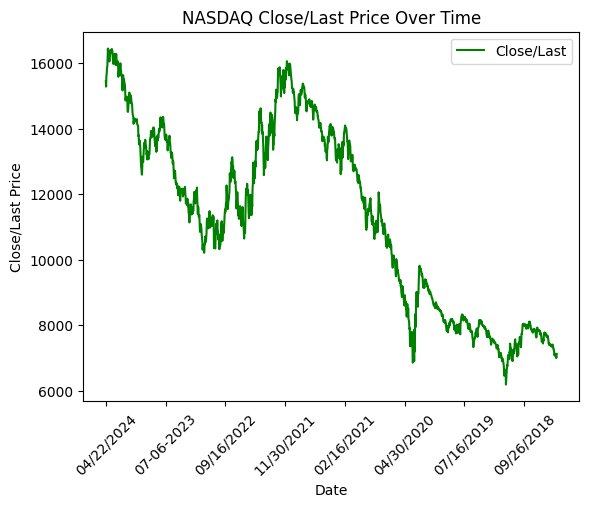

In [12]:

# Plot the data
plt.figure(figsize=(10,6))  # Adjust figure size if needed
df2.plot(x='Date', y='Close/Last', color='Green')

# Customize x-axis ticks
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Add labels and title if needed
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.title('NASDAQ Close/Last Price Over Time')

# Show plot
plt.show()


In [13]:
# List of file paths for each year's data
file_paths = ['/content/SP1.csv','/content/SP2.csv','/content/SP3.csv','/content/SP4.csv','/content/SP5.csv','/content/SP6.csv']

# Create an empty list to store DataFrames
df_SP500= []

# Read each data file into a separate DataFrame and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    df_SP500.append(df)

df_SP500 = pd.concat(df_SP500, ignore_index=True)

print(df_SP500)

            Date      Open      High       Low     Close
0     04/22/2024  4,987.33  5,038.84  4,969.40  5,010.60
1     04/19/2024  5,005.44  5,019.02  4,953.56  4,967.23
2     04/18/2024  5,031.52  5,056.66  5,001.89  5,011.12
3     04/17/2024  5,068.97  5,077.96  5,007.25  5,022.21
4     04/16/2024  5,064.59  5,079.84  5,039.83  5,051.41
...          ...       ...       ...       ...       ...
1509  04/27/2018  2,675.47  2,677.35  2,659.01  2,669.91
1510  04/26/2018  2,651.65  2,676.48  2,647.16  2,666.94
1511  04/25/2018  2,634.92  2,645.30  2,612.67  2,639.40
1512  04/24/2018  2,680.80  2,683.55  2,617.32  2,634.56
1513  04/23/2018  2,675.40  2,682.86  2,657.99  2,670.29

[1514 rows x 5 columns]


In [14]:
df_SP500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1514 non-null   object
 1   Open    1514 non-null   object
 2   High    1514 non-null   object
 3   Low     1514 non-null   object
 4   Close   1514 non-null   object
dtypes: object(5)
memory usage: 59.3+ KB


In [15]:
columns = ['Open', 'High', 'Low', 'Close']

# Replace commas with empty strings and convert to numeric
df_SP500[columns] = df_SP500[columns].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

In [16]:
df_SP500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1514 non-null   object 
 1   Open    1514 non-null   float64
 2   High    1514 non-null   float64
 3   Low     1514 non-null   float64
 4   Close   1514 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.3+ KB


In [17]:
print(df_SP500.head(5))

         Date     Open     High      Low    Close
0  04/22/2024  4987.33  5038.84  4969.40  5010.60
1  04/19/2024  5005.44  5019.02  4953.56  4967.23
2  04/18/2024  5031.52  5056.66  5001.89  5011.12
3  04/17/2024  5068.97  5077.96  5007.25  5022.21
4  04/16/2024  5064.59  5079.84  5039.83  5051.41


<Figure size 1000x600 with 0 Axes>

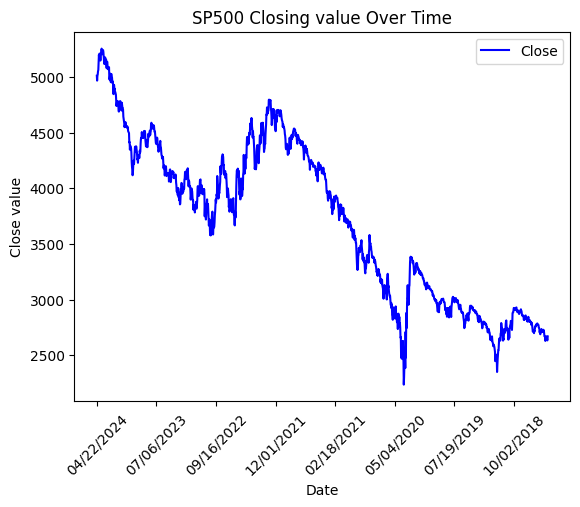

In [18]:

# Plot the data
plt.figure(figsize=(10,6))  # Adjust figure size if needed
df_SP500.plot(x='Date', y='Close', color='Blue')

# Customize x-axis ticks
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Add labels and title if needed
plt.xlabel('Date')
plt.ylabel('Close value')
plt.title('SP500 Closing value Over Time')

# Show plot
plt.show()

# 2. Perform stationarity test using Augmented Dickey-Fuller (ADF) Test, adfuller() in Python.

In [19]:


def adf_test(series, significance_level=0.05):
    adf = adfuller(series)

    print('ADF Statistic    :', adf[0])
    print('p-value          :', adf[1])
    print('critical values  :', adf[4])

    is_stationary = adf[1] <= significance_level
    print(f'Data is{" " if is_stationary else " not "}Stationary at {significance_level}')

    return is_stationary


In [20]:
adf_test(df_DJIA['Close'])
adf_test(df2['Close/Last'])
adf_test(df_SP500['Close'])


ADF Statistic    : -1.8025068997749927
p-value          : 0.37921779967370506
critical values  : {'1%': -3.4347053829922043, '5%': -2.863463625572207, '10%': -2.5677941141530387}
Data is not Stationary at 0.05
ADF Statistic    : -1.3217155594923309
p-value          : 0.6191797948401309
critical values  : {'1%': -3.4347170173134813, '5%': -2.8634687603081486, '10%': -2.5677968484444444}
Data is not Stationary at 0.05
ADF Statistic    : -1.6653667041870976
p-value          : 0.44903908093371153
critical values  : {'1%': -3.4347053829922043, '5%': -2.863463625572207, '10%': -2.5677941141530387}
Data is not Stationary at 0.05


False

 # 3.If not stationary, try to use some preprocessing techniques to make it stationary, for example, transformation, smoothing (weighted moving average, series.rolling, or Exponentially weighted moving average, series.ewm), remove trend, or decomposition

In [21]:
# Transformation: Log transformation
log_transformed_series = np.log1p(df2['Close/Last'])
adf_test(log_transformed_series)

adf_test(np.log1p(df_DJIA['Close']))

adf_test(np.log1p(df_SP500['Close']))

ADF Statistic    : -1.0010912877034432
p-value          : 0.752866071013955
critical values  : {'1%': -3.4347170173134813, '5%': -2.8634687603081486, '10%': -2.5677968484444444}
Data is not Stationary at 0.05
ADF Statistic    : -1.796528675930839
p-value          : 0.38218646652732113
critical values  : {'1%': -3.4347053829922043, '5%': -2.863463625572207, '10%': -2.5677941141530387}
Data is not Stationary at 0.05
ADF Statistic    : -1.4160502104792345
p-value          : 0.574557718609114
critical values  : {'1%': -3.4347053829922043, '5%': -2.863463625572207, '10%': -2.5677941141530387}
Data is not Stationary at 0.05


False

In [22]:
# Smoothing: Exponentially Weighted Moving Average (EWMA)
ewma_smoothed_series = df2['Close/Last'].ewm(span=12).mean()  # Adjust span as needed
adf_test(ewma_smoothed_series)

adf_test(df_DJIA['Close'].ewm(span=12).mean())

adf_test(df_SP500['Close'].ewm(span=12).mean())


ADF Statistic    : -1.3140996962541012
p-value          : 0.622697252638832
critical values  : {'1%': -3.4347199356122493, '5%': -2.86347004827819, '10%': -2.567797534300163}
Data is not Stationary at 0.05
ADF Statistic    : -1.700579842432821
p-value          : 0.43081374939170664
critical values  : {'1%': -3.4347082857569995, '5%': -2.863464906691409, '10%': -2.5677947963598196}
Data is not Stationary at 0.05
ADF Statistic    : -1.640408622391069
p-value          : 0.46204728368775877
critical values  : {'1%': -3.4347082857569995, '5%': -2.863464906691409, '10%': -2.5677947963598196}
Data is not Stationary at 0.05


False

In [23]:
#Smoothing(series.rolling)
window_size = 3

# NASDAQ
rolling_mean_nasdaq = df2['Close/Last'].rolling(window=window_size, center=False).mean().dropna()
adf_test(rolling_mean_nasdaq)

# DJIA
rolling_mean_djia = df_DJIA['Close'].rolling(window=window_size, center=False).mean().dropna()
adf_test(rolling_mean_djia)

# S&P 500
rolling_mean_sp500 = df_SP500['Close'].rolling(window=window_size, center=False).mean().dropna()
adf_test(rolling_mean_sp500)




ADF Statistic    : -1.1607014331568128
p-value          : 0.6902685178055512
critical values  : {'1%': -3.4347671645756304, '5%': -2.86349089226533, '10%': -2.5678086339403325}
Data is not Stationary at 0.05
ADF Statistic    : -1.5912659227702335
p-value          : 0.4879794441151736
critical values  : {'1%': -3.434755261885587, '5%': -2.863485639173984, '10%': -2.567805836609504}
Data is not Stationary at 0.05
ADF Statistic    : -1.4878369186431157
p-value          : 0.5395194316207456
critical values  : {'1%': -3.434755261885587, '5%': -2.863485639173984, '10%': -2.567805836609504}
Data is not Stationary at 0.05


False

In [24]:

# Detrending: Differencing for NASDAQ
differenced_series_nasdaq = df2['Close/Last'].diff().dropna()
adf_test(differenced_series_nasdaq)

# Detrending: Differencing for DJIA
differenced_series_djia = df_DJIA['Close'].diff().dropna()
adf_test(differenced_series_djia)

# Detrending: Differencing for S&P 500
differenced_series_sp500 = df_SP500['Close'].diff().dropna()
adf_test(differenced_series_sp500)



ADF Statistic    : -12.459742951614226
p-value          : 3.4270897950448487e-23
critical values  : {'1%': -3.4347170173134813, '5%': -2.8634687603081486, '10%': -2.5677968484444444}
Data is Stationary at 0.05
ADF Statistic    : -12.05363728323623
p-value          : 2.563201062186649e-22
critical values  : {'1%': -3.4347053829922043, '5%': -2.863463625572207, '10%': -2.5677941141530387}
Data is Stationary at 0.05
ADF Statistic    : -12.12060513910116
p-value          : 1.8290486249817625e-22
critical values  : {'1%': -3.4347053829922043, '5%': -2.863463625572207, '10%': -2.5677941141530387}
Data is Stationary at 0.05


True

# 4.Process the data and make training dataset and test dataset, for example, use the first 5 years daily closing index data for training, and use the next 1 year daily closing index data for test

In [25]:
# Convert 'Date' column to datetime format
df2['Date'] = pd.to_datetime(df2['Date'], format='mixed')

# Splitting the data into training and test sets
train_data_NASDAQ = df2[df2['Date'] < '04/22/2023']['Close/Last'].values
test_data_NASDAQ = df2[df2['Date'] >= '04/22/2023']['Close/Last'].values

print(f'Train data shape NASDAQ: {train_data_NASDAQ.shape}')
print(f'Test data shape NASDAQ: {test_data_NASDAQ.shape}')


Train data shape NASDAQ: (1259,)
Test data shape NASDAQ: (251,)


In [26]:

# Convert 'Date' column to datetime format
df_SP500['Date'] = pd.to_datetime(df_SP500['Date'], format='%m/%d/%Y')

# Splitting the data into training and test sets
train_data_SP500 = df_SP500[df_SP500['Date'] < '04-22-2023']['Close'].values
test_data_SP500 = df_SP500[df_SP500['Date'] >= '04-22-2023']['Close'].values

print(f'Train data shape SP500: {train_data_SP500.shape}')
print(f'Test data shape SP500: {test_data_SP500.shape}')


Train data shape SP500: (1263,)
Test data shape SP500: (251,)


In [27]:

# Convert 'Date' column to datetime format
df_DJIA['Date'] = pd.to_datetime(df_DJIA['Date'], format='%m/%d/%Y')

# Splitting the data into training and test sets
train_data_DJIA = df_DJIA[df_DJIA['Date'] < '04-22-2023']['Close'].values
test_data_DJIA = df_DJIA[df_DJIA['Date'] >= '04-22-2023']['Close'].values

print(f'Train data shape DJIA: {train_data_DJIA.shape}')
print(f'Test data shape DJIA: {test_data_DJIA.shape}')


Train data shape DJIA: (1263,)
Test data shape DJIA: (251,)


# 5.Review PyInform https://elife-asu.github.io/PyInform/index.html, and use transfer entropy to make prediction of the index, for example, based on Nasdaq and S&P500 to predict S&P500, or vice versa.

In [28]:

nasdaq_data = np.random.randint(100, size=100)
sp500_data = np.random.randint(100, size=100)

# Calculate transfer entropy from Nasdaq to S&P500
te_nasdaq_to_sp500 = pyinform.transferentropy.transfer_entropy(nasdaq_data, sp500_data, k=1)

# Calculate transfer entropy from S&P500 to Nasdaq
te_sp500_to_nasdaq = pyinform.transferentropy.transfer_entropy(sp500_data, nasdaq_data, k=1)

print("Transfer Entropy from Nasdaq to S&P500:", te_nasdaq_to_sp500)
print("Transfer Entropy from S&P500 to Nasdaq:", te_sp500_to_nasdaq)


X = nasdaq_data[:-1]
y = sp500_data[1:]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Transfer Entropy from Nasdaq to S&P500: 0.7991860149370079
Transfer Entropy from S&P500 to Nasdaq: 0.7402445708600429
Mean Squared Error: 846.9689325438292


# 6.Using ARIMA model in Python to make predictions.

Mean Squared Error: 10193159.464398375


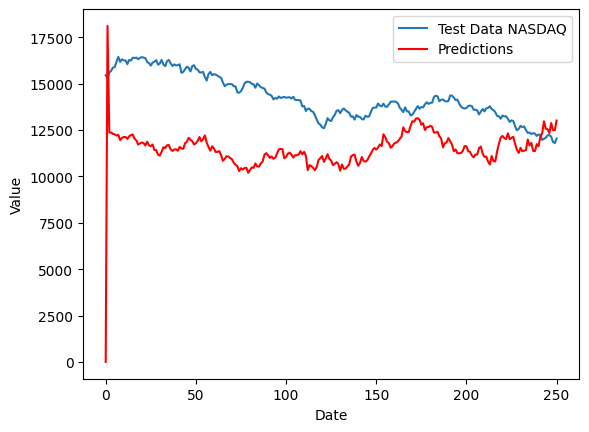

In [29]:

# Fit ARIMA model
model = ARIMA(train_data_NASDAQ, order=(1, 2, 2))
model_fit = model.fit()

# Forecast
forecast = model_fit.predict(start=0, end=len(test_data_NASDAQ)-1, typ='levels')

# Calculate Mean Squared Error
mse = mean_squared_error(test_data_NASDAQ, forecast)
print("Mean Squared Error:", mse)

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot test data and predictions
ax.plot(range(len(test_data_NASDAQ)), test_data_NASDAQ, label='Test Data NASDAQ')
ax.plot(range(len(test_data_NASDAQ)), forecast, label='Predictions',color='red')

# Set labels for x and y axes
ax.set_xlabel('Date')
ax.set_ylabel('Value')
# Add legend
ax.legend()
# Show plot
plt.show()





Mean Squared Error: 19627537.40189958


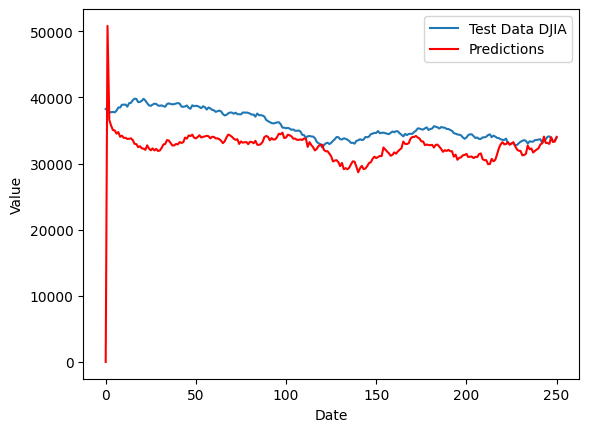

In [30]:
# Fit ARIMA model
model = ARIMA(train_data_DJIA, order=(1, 2, 2))
model_fit = model.fit()

# Forecast
forecast = model_fit.predict(start=0, end=len(test_data_DJIA)-1, typ='levels')

# Calculate Mean Squared Error
mse = mean_squared_error(test_data_DJIA, forecast)
print("Mean Squared Error:", mse)

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot test data and predictions
ax.plot(range(len(test_data_DJIA)), test_data_DJIA, label='Test Data DJIA')
ax.plot(range(len(test_data_DJIA)), forecast, label='Predictions',color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Mean Squared Error: 605852.358362373


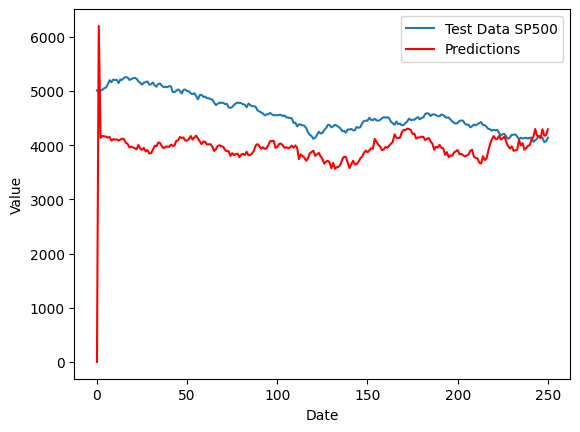

In [31]:

model = ARIMA(train_data_SP500, order=(1, 2, 2))
model_fit = model.fit()
# Forecast
forecast = model_fit.predict(start=0, end=len(test_data_SP500)-1, typ='levels')
mse = mean_squared_error(test_data_SP500, forecast)
print("Mean Squared Error:", mse)

# Create a new figure and axis object
fig, ax = plt.subplots()
# Plot test data and predictions
ax.plot(range(len(test_data_SP500)), test_data_SP500, label='Test Data SP500')
ax.plot(range(len(test_data_SP500)), forecast, label='Predictions',color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.show()

# 7. Using Neural Network, MLPRegressor, to make predictions.

Epoch 1/25
48/48 [==============================] - 10s 18ms/step - loss: 0.0698
Epoch 2/25
48/48 [==============================] - 1s 13ms/step - loss: 0.0065
Epoch 3/25
48/48 [==============================] - 1s 13ms/step - loss: 0.0044
Epoch 4/25
48/48 [==============================] - 1s 13ms/step - loss: 0.0040
Epoch 5/25
48/48 [==============================] - 1s 12ms/step - loss: 0.0036
Epoch 6/25
48/48 [==============================] - 1s 15ms/step - loss: 0.0035
Epoch 7/25
48/48 [==============================] - 1s 19ms/step - loss: 0.0033
Epoch 8/25
48/48 [==============================] - 1s 15ms/step - loss: 0.0032
Epoch 9/25
48/48 [==============================] - 1s 14ms/step - loss: 0.0033
Epoch 10/25
48/48 [==============================] - 1s 12ms/step - loss: 0.0031
Epoch 11/25
48/48 [==============================] - 1s 12ms/step - loss: 0.0030
Epoch 12/25
48/48 [==============================] - 1s 11ms/step - loss: 0.0031
Epoch 13/25
48/48 [=================

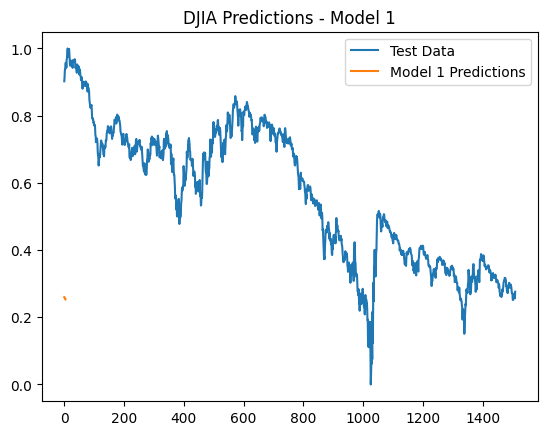

1/1 [==============================] - 0s 22ms/step


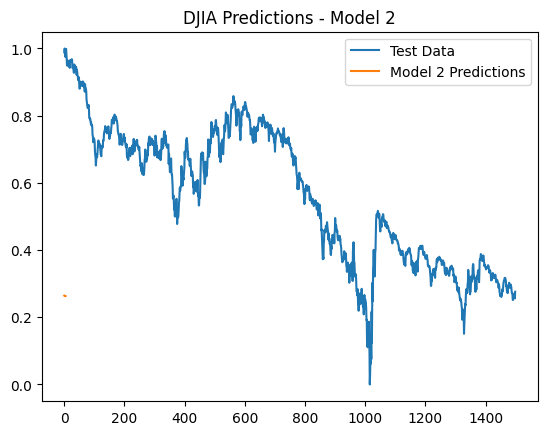

1/1 [==============================] - 0s 22ms/step


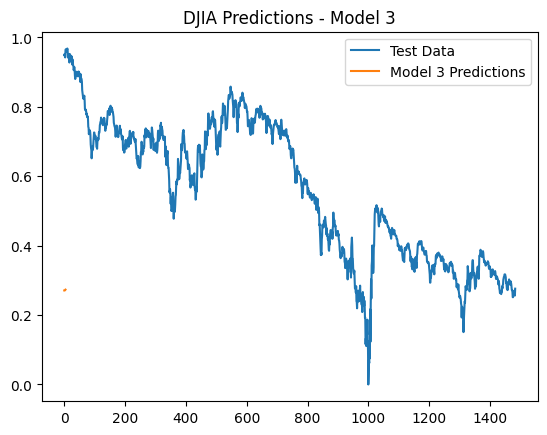

1/1 [==============================] - 0s 27ms/step


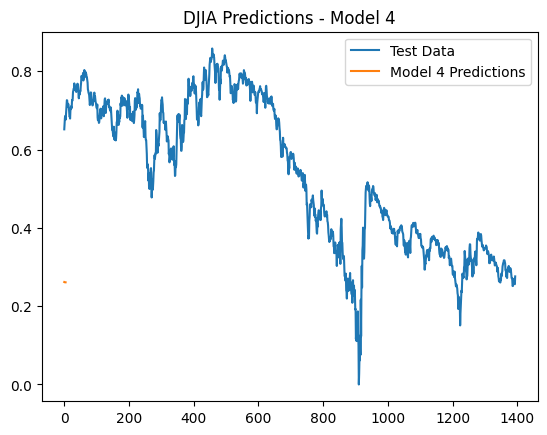

1/1 [==============================] - 0s 31ms/step


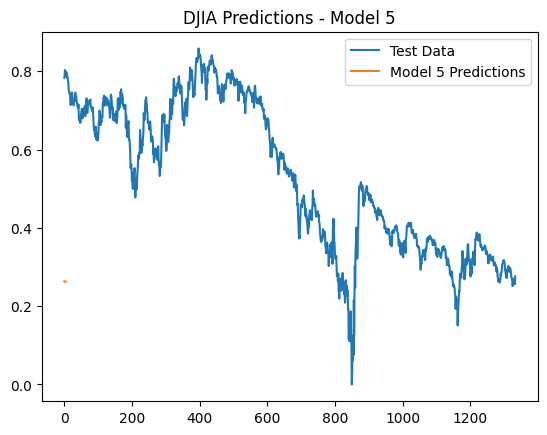

Model 1 MSE for DJIA: [[18605.58517552]]
Model 2 MSE for DJIA: [[18611.59780519]]
Model 3 MSE for DJIA: [[18610.17120994]]
Model 4 MSE for DJIA: [[18611.99364123]]
Model 5 MSE for DJIA: [[18619.57382493]]
1/1 [==============================] - 0s 32ms/step


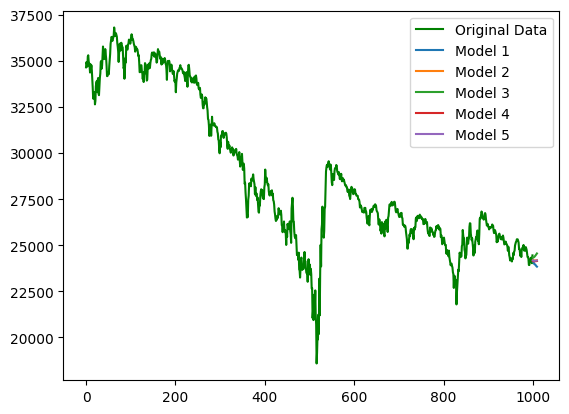

Epoch 1/25
48/48 [==============================] - 5s 8ms/step - loss: 0.0671
Epoch 2/25
48/48 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 3/25
48/48 [==============================] - 0s 8ms/step - loss: 0.0036
Epoch 4/25
48/48 [==============================] - 1s 11ms/step - loss: 0.0034
Epoch 5/25
48/48 [==============================] - 1s 11ms/step - loss: 0.0033
Epoch 6/25
48/48 [==============================] - 0s 10ms/step - loss: 0.0033
Epoch 7/25
48/48 [==============================] - 1s 11ms/step - loss: 0.0033
Epoch 8/25
48/48 [==============================] - 1s 11ms/step - loss: 0.0032
Epoch 9/25
48/48 [==============================] - 1s 12ms/step - loss: 0.0030
Epoch 10/25
48/48 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 11/25
48/48 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 12/25
48/48 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 13/25
48/48 [========================

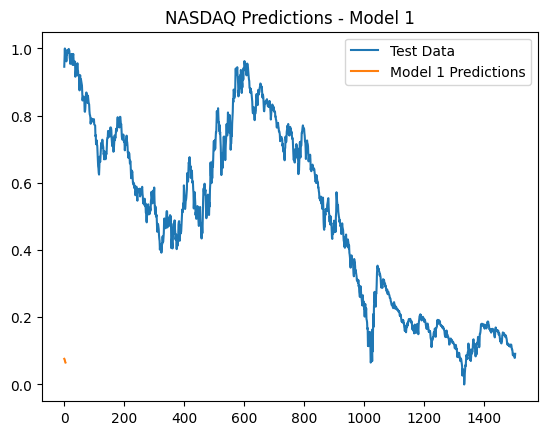

1/1 [==============================] - 0s 20ms/step


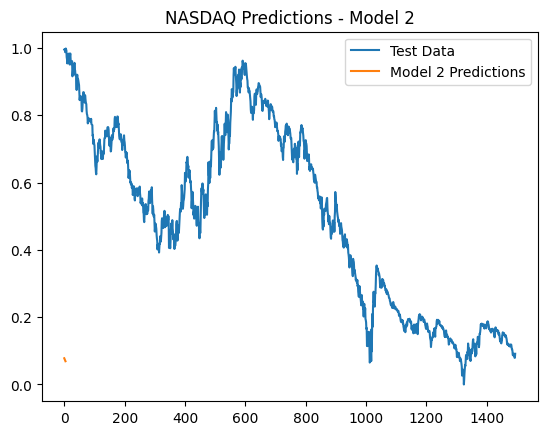

1/1 [==============================] - 0s 21ms/step


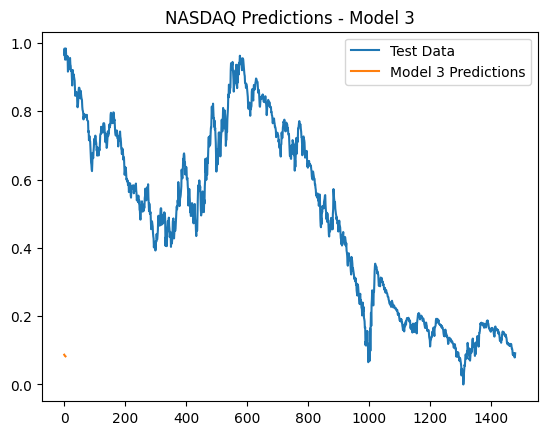

1/1 [==============================] - 0s 28ms/step


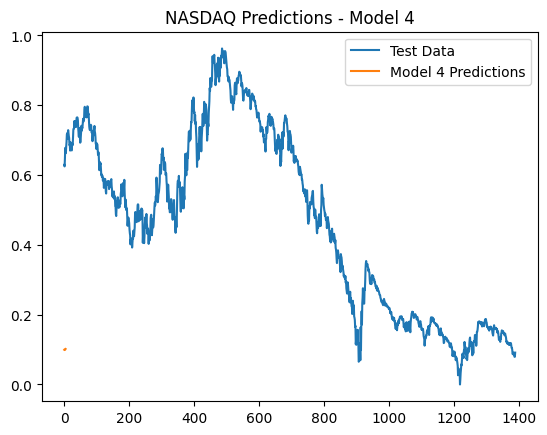

1/1 [==============================] - 0s 35ms/step


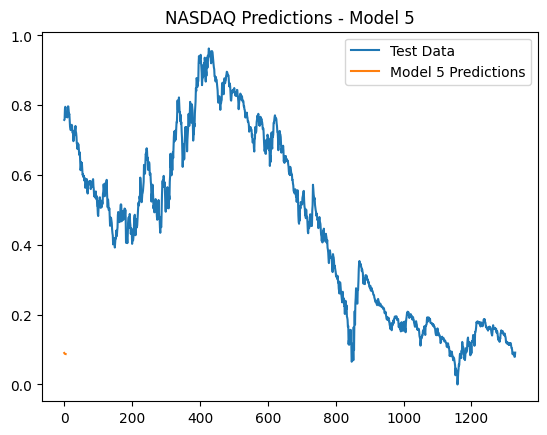

Model 1 MSE for NASDAQ: [[6200.00256898]]
Model 2 MSE for NASDAQ: [[6201.99063599]]
Model 3 MSE for NASDAQ: [[6204.2574154]]
Model 4 MSE for NASDAQ: [[6203.08150563]]
Model 5 MSE for NASDAQ: [[6201.23802382]]
1/1 [==============================] - 0s 56ms/step


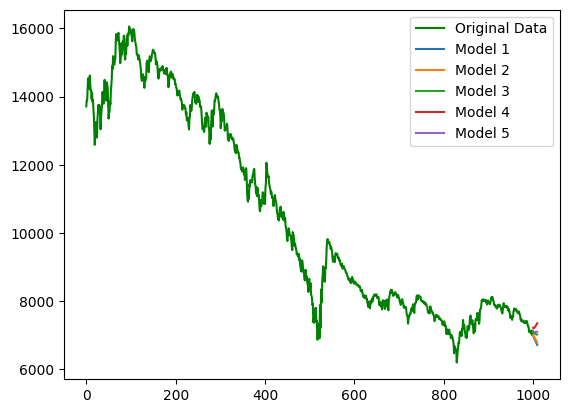

Epoch 1/25
48/48 [==============================] - 4s 8ms/step - loss: 0.0645
Epoch 2/25
48/48 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 3/25
48/48 [==============================] - 0s 8ms/step - loss: 0.0034
Epoch 4/25
48/48 [==============================] - 0s 8ms/step - loss: 0.0035
Epoch 5/25
48/48 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 6/25
48/48 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 7/25
48/48 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 8/25
48/48 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 9/25
48/48 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 10/25
48/48 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 11/25
48/48 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 12/25
48/48 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 13/25
48/48 [=============================

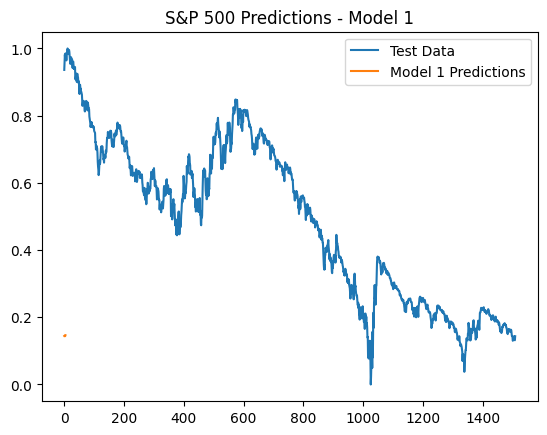

1/1 [==============================] - 0s 25ms/step


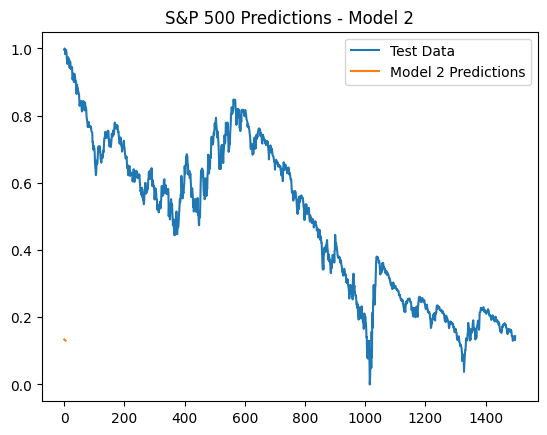

1/1 [==============================] - 0s 24ms/step


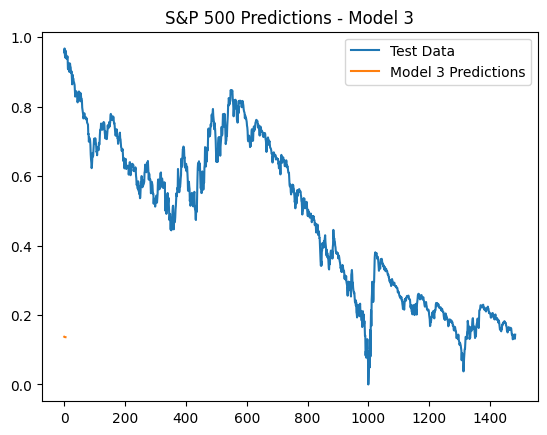

1/1 [==============================] - 0s 32ms/step


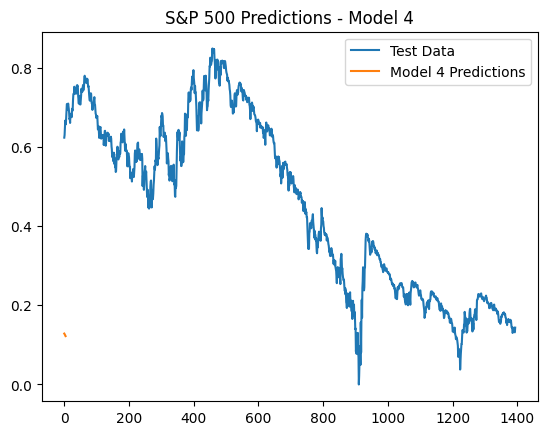

1/1 [==============================] - 0s 50ms/step


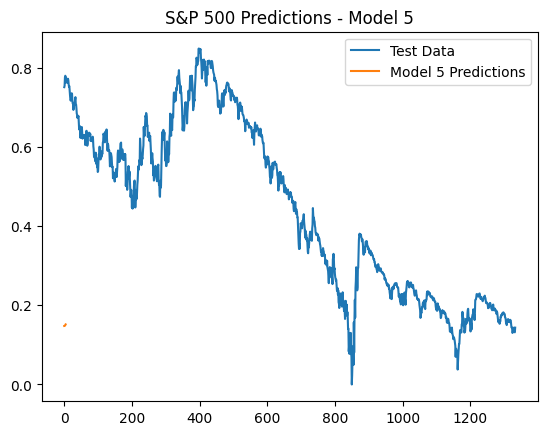

Model 1 MSE for S&P 500: [[2239.07853831]]
Model 2 MSE for S&P 500: [[2241.65199735]]
Model 3 MSE for S&P 500: [[2239.23545071]]
Model 4 MSE for S&P 500: [[2239.30429967]]
Model 5 MSE for S&P 500: [[2239.52812462]]
1/1 [==============================] - 0s 31ms/step


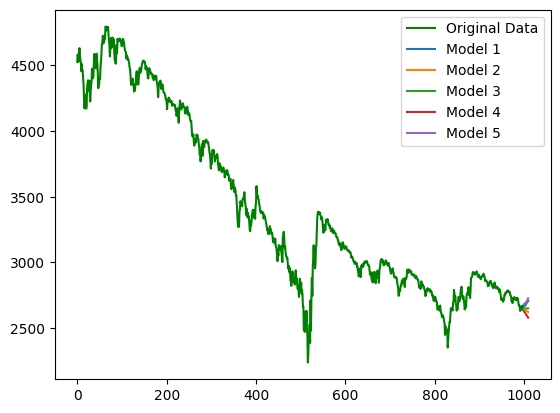

In [32]:

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

def create_model(seq_length):
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def train_model(model, X_train, y_train, epochs=25):
    early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, callbacks=[early_stopping])
    return model, history

def predict_future(model, x_test, steps=5):
    predictions = []
    for step in range(steps):
        pred = model.predict(x_test)
        predictions.append(pred[0])

        modified = x_test[:, 1:, :]
        x_test = np.concatenate([modified, pred.reshape(1, 1, 1)], axis=1)

    return predictions

def plot_predictions(data, predictions, start, steps, labels):
    x_range = range(start, start + steps)
    plt.plot(range(len(data[-start:])), data[-start:], color='green', label='Original Data')
    for preds, label in zip(predictions, labels):
        plt.plot(x_range, preds, label=label)
    plt.legend()
    plt.show()

def process_dataset(df, name):
    data = df.values.reshape(-1, 1)
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    # Define sequence lengths
    sequence_lengths = [5, 15, 30, 120, 180]

    # Create models and sequences for each sequence length
    models = []
    sequences = []
    for seq_length in sequence_lengths:
        X_seq, y_seq = create_sequences(scaled_data, seq_length)
        sequences.append((X_seq, y_seq))
        model = create_model(seq_length)
        models.append(model)

    # Train models and store history
    trained_models = []
    histories = []
    for model, (X_seq, y_seq) in zip(models, sequences):
        trained_model, history = train_model(model, X_seq, y_seq)
        trained_models.append(trained_model)
        histories.append(history)

    # Evaluate models
    MSE = []
    for model, (X_seq, y_seq) in zip(trained_models, sequences):
        pred = model.predict(X_seq)
        mse = mean_squared_error(pred, y_seq)
        MSE.append(mse)

    # Plot predictions for each model
    for idx, (model, (X_seq_test, y_seq_test)) in enumerate(zip(trained_models, sequences)):
        predictions = predict_future(model, X_seq_test[-1:], steps=5)
        plt.plot(range(len(y_seq_test)), y_seq_test, label='Test Data')
        plt.plot(range(len(predictions)), predictions, label=f'Model {idx+1} Predictions')
        plt.legend()
        plt.title(f"{name} Predictions - Model {idx+1}")
        plt.show()

    # Print MSE for each model
    for idx, mse in enumerate(MSE):
        print(f"Model {idx+1} MSE for {name}: {scaler.inverse_transform([[mse]])}")

    # Plot future predictions
    steps = 10
    start = 1000
    future_preds = []
    for model, (X_seq, _) in zip(trained_models, sequences):
        future_preds.append(scaler.inverse_transform(predict_future(model, X_seq[-1:], steps)))

    plot_predictions(data, future_preds, start, steps, [f'Model {i+1}' for i in range(len(trained_models))])

# Call the function for each dataset
process_dataset(df_DJIA['Close'], 'DJIA')
process_dataset(df2['Close/Last'], 'NASDAQ')
process_dataset(df_SP500['Close'], 'S&P 500')


# 8.As a bonus, please predict the closing index value of S&P 500 on April 15, 16, 17, 18, 19based on your predictors in (5)(6)(7). If your predicted values are within 10 points of the actual values, you will get 1 extra point/day towards your total grades, for up to 5 points.

In [33]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from datetime import datetime, timedelta

# Extract historical data until April 22
historical_data = df_SP500[df_SP500['Date'] <= '2024-04-22']['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(historical_data)

seq_length = 30

X_seq = []
for i in range(len(scaled_data) - seq_length):
    X_seq.append(scaled_data[i:i+seq_length])
X_seq = np.array(X_seq)

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_seq, scaled_data[seq_length:], epochs=25, batch_size=32)

# Function to predict future values
def predict_future(model, last_sequence, steps):
    predictions = []
    current_sequence = last_sequence
    for _ in range(steps):
        pred = model.predict(current_sequence.reshape(1, seq_length, 1))
        predictions.append(pred[0][0])
        current_sequence = np.append(current_sequence[1:], pred[0][0]).reshape(seq_length, 1)
    return predictions

# Predict closing index values for April 23, 24, 25, 26, and 27
last_sequence = scaled_data[-seq_length:]
predictions = predict_future(model, last_sequence, 5)

# Inverse transform the predictions to get actual index values
predicted_values = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Convert predicted values to DataFrame with dates
predicted_dates = [datetime.strptime('2024-04-23', '%Y-%m-%d') + timedelta(days=i) for i in range(5)]
predicted_df = pd.DataFrame({'Date': predicted_dates, 'Predicted_Close': predicted_values.flatten()})
print(predicted_df)


Epoch 1/25
47/47 [==============================] - 5s 25ms/step - loss: 0.0390
Epoch 2/25
47/47 [==============================] - 2s 35ms/step - loss: 0.0043
Epoch 3/25
47/47 [==============================] - 2s 38ms/step - loss: 0.0034
Epoch 4/25
47/47 [==============================] - 1s 25ms/step - loss: 0.0031
Epoch 5/25
47/47 [==============================] - 1s 25ms/step - loss: 0.0032
Epoch 6/25
47/47 [==============================] - 1s 26ms/step - loss: 0.0027
Epoch 7/25
47/47 [==============================] - 1s 26ms/step - loss: 0.0031
Epoch 8/25
47/47 [==============================] - 1s 25ms/step - loss: 0.0030
Epoch 9/25
47/47 [==============================] - 1s 25ms/step - loss: 0.0030
Epoch 10/25
47/47 [==============================] - 1s 25ms/step - loss: 0.0027
Epoch 11/25
47/47 [==============================] - 1s 26ms/step - loss: 0.0028
Epoch 12/25
47/47 [==============================] - 2s 39ms/step - loss: 0.0026
Epoch 13/25
47/47 [==================